In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [2]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/#20_Transfer_Learning')

In [3]:
np.random.seed(3)
tf.random.set_seed(3)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('./train',
                                                   target_size=(150, 150),
                                                   batch_size=5,
                                                   class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('./test',
                                                 target_size=(150,150),
                                                 batch_size=5,
                                                 class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002), 
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

Epoch 1/20
32/32 [==============================] - 11s 64ms/step - loss: 0.7036 - accuracy: 0.4938 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/20
32/32 [==============================] - 2s 47ms/step - loss: 0.6967 - accuracy: 0.4938 - val_loss: 0.6875 - val_accuracy: 0.5083
Epoch 3/20
32/32 [==============================] - 2s 57ms/step - loss: 0.6910 - accuracy: 0.5188 - val_loss: 0.6798 - val_accuracy: 0.5500
Epoch 4/20
32/32 [==============================] - 2s 60ms/step - loss: 0.6793 - accuracy: 0.5750 - val_loss: 0.6671 - val_accuracy: 0.5583
Epoch 5/20
32/32 [==============================] - 1s 45ms/step - loss: 0.6643 - accuracy: 0.6375 - val_loss: 0.6786 - val_accuracy: 0.5000
Epoch 6/20
32/32 [==============================] - 2s 47ms/step - loss: 0.6541 - accuracy: 0.6000 - val_loss: 0.6362 - val_accuracy: 0.6083
Epoch 7/20
32/32 [==============================] - 1s 46ms/step - loss: 0.6386 - accuracy: 0.6250 - val_loss: 0.6109 - val_accuracy: 0.7167
Epoch 8/20
3

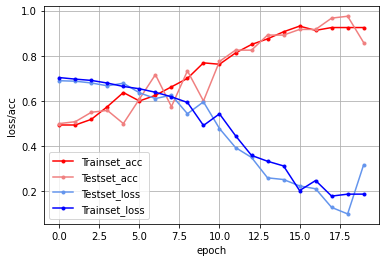

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')


plt.legend(loc='lower left')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()